# Data visualisation

In [58]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# read csv training data
df = pd.read_csv('train.csv')

# Data visualisation

In [60]:
df.head()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,37,19274330,-1,0,2569487005,1830830742,4228834423,652481754,2967512603,...,0,0,0,0,0,0,0,419316267,3617851689,4220791646
1,-1,55,19274334,-1,0,3191875643,403381353,1238330876,652481754,2967512603,...,0,0,0,0,1,0,0,1968545380,3831440054,1213938795
2,-1,114,19274353,-1,0,2634604934,403381353,1928325921,652481754,2967512603,...,0,0,0,0,0,0,0,1405802835,2379633508,1284343215
3,-1,128,19274358,-1,0,2569487005,403381353,296915027,652481754,2967512603,...,0,0,0,0,0,0,0,2299319102,3617851689,4220791646
4,-1,164,19274367,-1,0,2569487005,403381353,681762206,652481754,2967512603,...,0,0,0,0,0,0,0,1306075469,3617851689,4220791646


In [61]:
df.describe()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
count,31428.000000,31428.000000,3.142800e+04,3.142800e+04,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,...,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04
mean,-0.996373,321870.448835,1.931855e+07,3.504330e+04,11.799701,2.264373e+09,1.331820e+09,2.255368e+09,1.018468e+09,2.741699e+09,...,0.134307,0.002386,0.027269,0.002164,0.415680,0.042319,0.057560,2.218926e+09,2.939366e+09,2.158890e+09
std,0.085098,184665.780120,1.690395e+04,8.221503e+05,4.695434,1.077516e+09,7.900907e+08,1.125852e+09,7.260969e+08,3.771211e+08,...,1.258795,0.156001,0.562668,0.079745,3.184785,1.008314,1.158253,1.235285e+09,1.020598e+09,1.416777e+09
min,-1.000000,37.000000,1.927433e+07,-1.000000e+00,0.000000,7.942600e+04,4.033814e+08,5.538985e+06,3.063949e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626600e+04,4.393702e+07,2.456084e+08
25%,-1.000000,162636.500000,1.930609e+07,-1.000000e+00,8.000000,1.464958e+09,4.033814e+08,1.408383e+09,6.524818e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.140301e+09,2.379634e+09,1.213939e+09
50%,-1.000000,322691.500000,1.931761e+07,-1.000000e+00,12.000000,2.569487e+09,1.235983e+09,2.243934e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.274128e+09,3.617852e+09,1.284343e+09
75%,-1.000000,481852.000000,1.933113e+07,-1.000000e+00,15.000000,2.834768e+09,2.018710e+09,3.326547e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.376114e+09,3.831440e+09,4.220792e+09
max,1.000000,638505.000000,1.936054e+07,1.935732e+07,23.000000,4.294924e+09,2.541204e+09,4.292704e+09,2.308171e+09,3.955179e+09,...,20.000000,20.000000,20.000000,10.000000,97.000000,85.000000,86.000000,4.294964e+09,3.831440e+09,4.220792e+09


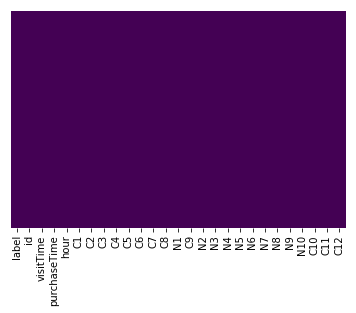

In [62]:
#check for missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No missing values. We now check the class distribution

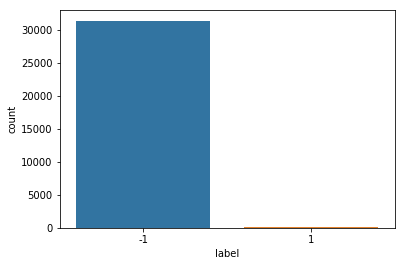

In [63]:
sns.countplot(data=df, x='label')

In [64]:
df['label'].value_counts()

-1    31371
 1       57
Name: label, dtype: int64

### -> Imbalance of classes

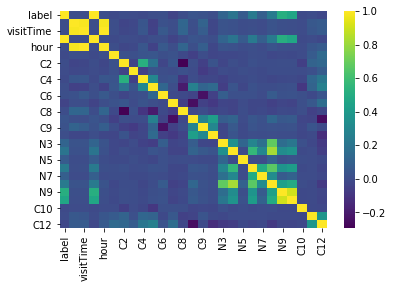

In [65]:
sns.heatmap(df.corr(), cmap = 'viridis')

### -> visitTime and hour are highly corrleated. There, we remove visitTime

In [172]:
df.drop('visitTime', axis=1, inplace=True)

KeyError: "['visitTime'] not found in axis"

# Train test split

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
df.head()

,label,id,purchaseTime,hour,C1,C2,C3,C4,C5,C6,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,37,-1,0,2569487005,1830830742,4228834423,652481754,2967512603,3624739744,...,0,0,0,0,0,0,0,419316267,3617851689,4220791646
1,-1,55,-1,0,3191875643,403381353,1238330876,652481754,2967512603,179712055,...,0,0,0,0,1,0,0,1968545380,3831440054,1213938795
2,-1,114,-1,0,2634604934,403381353,1928325921,652481754,2967512603,1607619193,...,0,0,0,0,0,0,0,1405802835,2379633508,1284343215
3,-1,128,-1,0,2569487005,403381353,296915027,652481754,2967512603,10212495,...,0,0,0,0,0,0,0,2299319102,3617851689,4220791646
4,-1,164,-1,0,2569487005,403381353,681762206,652481754,2967512603,580883881,...,0,0,0,0,0,0,0,1306075469,3617851689,4220791646


In [69]:
X = df[df.columns.difference(['label'])]
y = df['label']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, test_size = 0.33, stratify = y)

Oversample minority class and undersample majority class

In [71]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
print(Counter(y))

Counter({0: 9900, 1: 100})


In [72]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [73]:
# define pipeline
over = SMOTE()

In [74]:
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

Counter({0: 9900, 1: 9900})


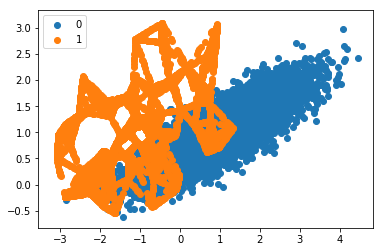

In [75]:
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [76]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 9900})


Standardizing features

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

# Model 1: Logistic Regression

We search for the best C parameter with Lasso Regularization to avoid overfitting

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
C = [10, 1, .1, .001]

In [81]:
for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train_std, y_train))
    print('Test accuracy:', clf.score(X_test_std, y_test))
    print('')

C: 10
Training accuracy: 0.5066489361702128
Test accuracy: 0.5078094870806016

C: 1
Training accuracy: 0.5053191489361702
Test accuracy: 0.5064596991901272

C: 0.1
Training accuracy: 0.5130129179331308
Test accuracy: 0.5151369070574624

C: 0.001
Training accuracy: 0.679426291793313
Test accuracy: 0.684053220208253



We can now use the C parameter with the best result (C=0.001) for the training set (because this is already oversampled)

In [82]:
LR_model = LogisticRegression(penalty='l1', C=0.001, solver='liblinear')
LR_model.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
y_pred_LR = LR_model.predict(X_test)

In [84]:
X_test.count()

C1              10372
C10             10372
C11             10372
C12             10372
C2              10372
C3              10372
C4              10372
C5              10372
C6              10372
C7              10372
C8              10372
C9              10372
N1              10372
N10             10372
N2              10372
N3              10372
N4              10372
N5              10372
N6              10372
N7              10372
N8              10372
N9              10372
hour            10372
id              10372
purchaseTime    10372
dtype: int64

In [85]:
y_prob_LR = LR_model.predict_proba(X_test)

In [86]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [87]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     10353
           1       1.00      1.00      1.00        19

    accuracy                           1.00     10372
   macro avg       1.00      1.00      1.00     10372
weighted avg       1.00      1.00      1.00     10372



In [88]:
confusion_matrix(y_test, y_pred_LR)

array([[10353,     0],
       [    0,    19]])

In [89]:
roc_auc_score(y_test, y_pred_LR)

1.0

# Model 2: Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
RF_model = RandomForestClassifier(n_estimators=60)

In [92]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
y_pred_RF = RF_model.predict(X_test) # output as class label

In [94]:
y_prob_RF = RF_model.predict_proba(X_test) # output as probability

In [95]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     10353
           1       1.00      1.00      1.00        19

    accuracy                           1.00     10372
   macro avg       1.00      1.00      1.00     10372
weighted avg       1.00      1.00      1.00     10372



In [96]:
roc_auc_score(y_test, y_pred_RF)

1.0

We can see that the Logistic REgression model produced the higher AUC score. Therefore, we will use this model to deploy to our testing set.

# Deploying model on Testing Dataset

In [156]:
df_test = pd.read_csv('test.csv')

In [157]:
df_test.drop(['visitTime','label'], axis=1, inplace=True)

In [158]:
df_test

,id,purchaseTime,hour,C1,C2,C3,C4,C5,C6,C7,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,1,-1,0,2569487005,403381353,681762206,652481754,2967512603,580883881,2303407174,...,0,0,0,0,0,0,0,2128770044,3617851689,4220791646
1,2,-1,0,2416811818,1235983246,3653557526,652481754,2116767313,571765677,2303407174,...,0,0,0,0,0,0,0,4256459078,2379633508,1284343215
2,3,-1,0,3765056181,1235983246,1310333812,652481754,2116767313,571765677,2303407174,...,0,0,0,0,0,0,0,2840358457,3831440054,1213938795
3,4,-1,0,955802445,403381353,2290282995,652481754,2967512603,1607619193,1342367140,...,0,0,0,0,0,0,0,4039873369,535829057,3828748840
4,5,-1,0,2569487005,2517724481,2463986301,2308170622,2967512603,580883881,2303407174,...,0,0,0,0,0,0,0,907610626,3617851689,4220791646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32081,32082,-1,23,2569487005,2018710401,887116886,652481754,2967512603,3624739744,2303407174,...,0,0,0,0,0,0,0,1546561973,3617851689,4220791646
32082,32083,-1,23,2569487005,403381353,3475347077,652481754,2967512603,4013717548,2303407174,...,0,0,0,0,0,0,0,3227742820,3617851689,4220791646
32083,32084,-1,23,2569487005,403381353,3475347077,652481754,2967512603,4013717548,2303407174,...,0,0,0,0,0,0,0,4069315994,3617851689,4220791646
32084,32085,-1,23,2569487005,2541203883,448895441,2308170622,2967512603,3624739744,2303407174,...,0,0,0,0,0,0,0,2724771230,3617851689,4220791646


In [159]:
final_id = df_test['id']

In [160]:
df_test.head()

,id,purchaseTime,hour,C1,C2,C3,C4,C5,C6,C7,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,1,-1,0,2569487005,403381353,681762206,652481754,2967512603,580883881,2303407174,...,0,0,0,0,0,0,0,2128770044,3617851689,4220791646
1,2,-1,0,2416811818,1235983246,3653557526,652481754,2116767313,571765677,2303407174,...,0,0,0,0,0,0,0,4256459078,2379633508,1284343215
2,3,-1,0,3765056181,1235983246,1310333812,652481754,2116767313,571765677,2303407174,...,0,0,0,0,0,0,0,2840358457,3831440054,1213938795
3,4,-1,0,955802445,403381353,2290282995,652481754,2967512603,1607619193,1342367140,...,0,0,0,0,0,0,0,4039873369,535829057,3828748840
4,5,-1,0,2569487005,2517724481,2463986301,2308170622,2967512603,580883881,2303407174,...,0,0,0,0,0,0,0,907610626,3617851689,4220791646


In [161]:
X_val = df_test # creating our validation test set (features only)

In [163]:
y_val = RF_model.predict_proba(X_val)

In [164]:
final_prob = y_val[:,1] #selecting the second column (which is the probability for class 1)

In [165]:
df_test['id'] = final_id

In [166]:
df_test['Prob'] = final_prob

In [167]:
df_test.head()

,id,purchaseTime,hour,C1,C2,C3,C4,C5,C6,C7,...,N5,N6,N7,N8,N9,N10,C10,C11,C12,Prob
0,1,-1,0,2569487005,403381353,681762206,652481754,2967512603,580883881,2303407174,...,0,0,0,0,0,0,2128770044,3617851689,4220791646,0.666667
1,2,-1,0,2416811818,1235983246,3653557526,652481754,2116767313,571765677,2303407174,...,0,0,0,0,0,0,4256459078,2379633508,1284343215,0.650000
2,3,-1,0,3765056181,1235983246,1310333812,652481754,2116767313,571765677,2303407174,...,0,0,0,0,0,0,2840358457,3831440054,1213938795,0.633333
3,4,-1,0,955802445,403381353,2290282995,652481754,2967512603,1607619193,1342367140,...,0,0,0,0,0,0,4039873369,535829057,3828748840,0.650000
4,5,-1,0,2569487005,2517724481,2463986301,2308170622,2967512603,580883881,2303407174,...,0,0,0,0,0,0,907610626,3617851689,4220791646,0.666667


In [168]:
#selecting only Id and probability columns
df_test = df_test[['id', 'Prob']]

In [169]:
df_test.head()

,id,Prob
0,1,0.666667
1,2,0.650000
2,3,0.633333
3,4,0.650000
4,5,0.666667


In [171]:
#saving output to csv
df_test.to_csv('prediction output_MaximilianBaum_e197614.csv', index=False)